# Overview

This week is about tying everything together. We try to combine our work on networks plus our work on language in order to understand and analyze human behavior. We'll be working on a cool dataset of humans playing a game on (a special version of) wikipedia called "wikispeedia" (the game is now defunct and wikispeedia.org is a page about GPS coordinates of speed-traps, so you can't play it). 

Here's how the game worked:

> In the game, users are asked to navigate from a given _source_ article (e.g. https://en.wikipedia.org/wiki/Gold_dollar) to a given _target_ article (e.g. https://en.wikipedia.org/wiki/Ronald_Reagan), **by only clicking Wikipedia links**. A condensed version of Wikipedia (4,604 articles) is used. 

So this dataset contains **human navigation paths** (clicking from page to page to find a target) and today we will work on this dataset to see if we can use our skills to understand how human navigation works. We will think about the following questions.

* Path lengths
* Betweenness from the human perspective
* What characterizes human paths?

Since we're putting our existing skills to use, there is very little reading today - it's all about exploring the dataset. Let's get started.

## Download the dataset

The first thing we're going to do is download the dataset. Today everything related to data is nice, clean, and easy to work with (Yay). You can get the dataset [here](https://snap.stanford.edu/data/wikispeedia.html). You will need to get 

* The list of wiki articles
* The network connections
* The navigation paths
* Plaintext of the wiki articles

# Path lengths

The first thing we want to take a look at is path lengths. NetworkX allows us to calculate the shortest path between any pair of articles. We begin by comparing the length of human and shortests paths. 

_Exercises_
> * For each _source_/_target_ pair in the list of human navigation paths, calculate the shortest path using NetworkX. Plot the distribution of path lengths. Mine looks something like this:
![alt text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/shortest-path.png)

In [19]:
%matplotlib inline
import networkx as nx
import csv
import os, sys
import pandas as pd
import urllib
from __future__ import print_function
from __future__ import division
from pandas import DataFrame
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
cwd = os.getcwd()
pathfinished_file_path=os.getcwd()+"\wikispeedia_paths-and-graph\\paths_finished.tsv"
link_file_path=os.getcwd()+"\wikispeedia_paths-and-graph\\links.tsv"
node_file_path=os.getcwd()+"\wikispeedia_paths-and-graph\\articles.tsv"
print(pathfinished_file_path)
print(link_file_path)
print(node_file_path)

node_df=pd.read_csv(node_file_path, sep="\t",skiprows=12,names=['article'],encoding='utf-8')
link_df=pd.read_csv(link_file_path, sep="\t",skiprows=12,names=['linkSource','linkTarget'],encoding='utf-8')
G=nx.DiGraph()
for index, row in node_df.iterrows():
    G.add_node(urllib.unquote_plus(str(row.values[0])))
for index, row in link_df.iterrows():
    G.add_edge(urllib.unquote_plus(str(row.values[0])),urllib.unquote_plus(str(row.values[1])))


#print (path_df)

D:\1st Semester Master\Social Graphs and interaction\lesson8\wikispeedia_paths-and-graph\paths_finished.tsv
D:\1st Semester Master\Social Graphs and interaction\lesson8\wikispeedia_paths-and-graph\links.tsv
D:\1st Semester Master\Social Graphs and interaction\lesson8\wikispeedia_paths-and-graph\articles.tsv


path does not exist between Bird Wikipedia_Text_of_the_GNU_Free_Documentation_License at row index 2395
The shortest path histogram counts Counter({3: 30018, 2: 13078, 4: 6579, 1: 1172, 5: 430, 6: 29, 0: 11})


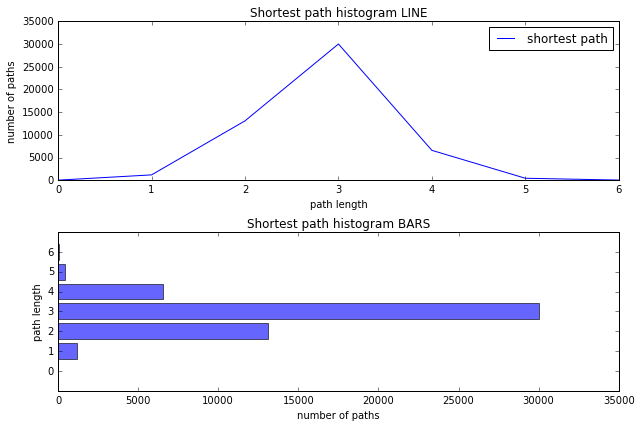

In [20]:
paths_length=[]
unexist_paths={}
path_df=pd.read_csv(pathfinished_file_path, sep="\t",skiprows=15,names=['hashedIpAddress','timestamp','durationInSec','path','rating'],usecols=['path'],encoding='utf-8')
for index, row in path_df.iterrows():
    steps=row.values[0].split(';')
    hum_source=urllib.unquote_plus(str(steps[0]))
    hum_target=urllib.unquote_plus(str(steps[-1]))
    try:
        spath=nx.shortest_path_length(G,source=hum_source,target=hum_target)
        paths_length.append(spath)
    except:
        print ("path does not exist between",hum_source,hum_target,"at row index",index)
        unexist_paths[index]=spath

paths_count=Counter(paths_length)
print ('The shortest path histogram counts',paths_count)

#draw plot
# Counter data, counter is your counter object
keys = paths_count.keys()
y_pos = np.arange(len(keys))
# get the counts for each key, assuming the values are numerical
performance = [paths_count[k] for k in keys]

# init plot labels
fig = plt.figure(num=None, figsize=(9, 6), dpi=160, facecolor='w', edgecolor='k')
fig.suptitle('', fontsize=28)
    
plt.subplot(2, 1, 1)
line = plt.plot(keys, performance, label='shortest path')
plt.legend(handles=line)
plt.title('Shortest path histogram LINE')
plt.ylabel('number of paths')
plt.xlabel('path length')

plt.subplot(2, 1, 2)
plt.barh(y_pos, performance, align='center', alpha=0.6)
plt.yticks(y_pos, keys)
plt.xlabel('number of paths')
plt.ylabel('path length')
plt.title('Shortest path histogram BARS')

plt.tight_layout()
plt.show()


> * For each _source_/_target_ pair, calculate the length of the human path. The dataset contains information on people who regret a navigation step and hit the "back" button in their web-browser. It's up to you how to incorporate that information in the path. Justify your choice. Plot the distribution of human path lengths. If I ignore back steps, I get this on log-log scale:
![alt text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/human-path.png)

> * How much longer are the human paths on average?
> * Create scatter plot where each point is a _source_/_target_ pair, and you have human path lengths on the $x$-axis and shortests paths on the $y$-axis.
> * Is there a correlation between human/shortest path-lengths? What is the correlation.

In [43]:
#load the source & target of human navigation path (skip the non-exist path in the network)
steps_length=[]
for index, row in path_df.iterrows():    
    if row.values[0].split(';')[0]=="Bird" and row.values[0].split(';')[-1]=="Wikipedia_Text_of_the_GNU_Free_Documentation_License":
        print ("skips the unexist path at index",index)
        continue
    steps=row.values[0].split(';')
    clean_steps=filter(lambda step: step != '<', steps) 

    steps_length.append(len(clean_steps)) 
    
steps_length_count=Counter(steps_length)
print (steps_length_count)
print ("Average human naviagation path length",sum(steps_length)/len(steps_length))

skips the unexist path at index 2395
Counter({5: 11449, 6: 8877, 4: 8719, 7: 6147, 8: 4055, 3: 3444, 9: 2453, 10: 1572, 11: 1083, 2: 797, 12: 668, 13: 509, 14: 348, 15: 255, 16: 183, 17: 140, 18: 107, 19: 100, 20: 59, 21: 56, 22: 42, 23: 36, 24: 24, 25: 21, 26: 20, 29: 17, 27: 14, 1: 11, 28: 11, 31: 11, 30: 10, 32: 10, 33: 8, 34: 8, 38: 6, 35: 5, 37: 5, 36: 4, 39: 3, 47: 3, 40: 2, 41: 2, 42: 2, 44: 2, 51: 2, 54: 2, 420: 1, 43: 1, 45: 1, 46: 1, 48: 1, 49: 1, 50: 1, 52: 1, 55: 1, 60: 1, 65: 1, 72: 1, 91: 1, 103: 1, 114: 1})
Average human naviagation path length 6.35686029971


In [44]:
#How much longer are the human paths on average?
aver_diffs=[]
for path_length, step_length in zip(paths_length,steps_length): #paths_lengh -> shortest path ; steps_length -> human navigation path
    aver_diffs.append(step_length-path_length)
print ("Average longer distance from human navigation & shortest path",sum(aver_diffs)/len(aver_diffs))

Average longer distance from human navigation & shortest path 3.511370501


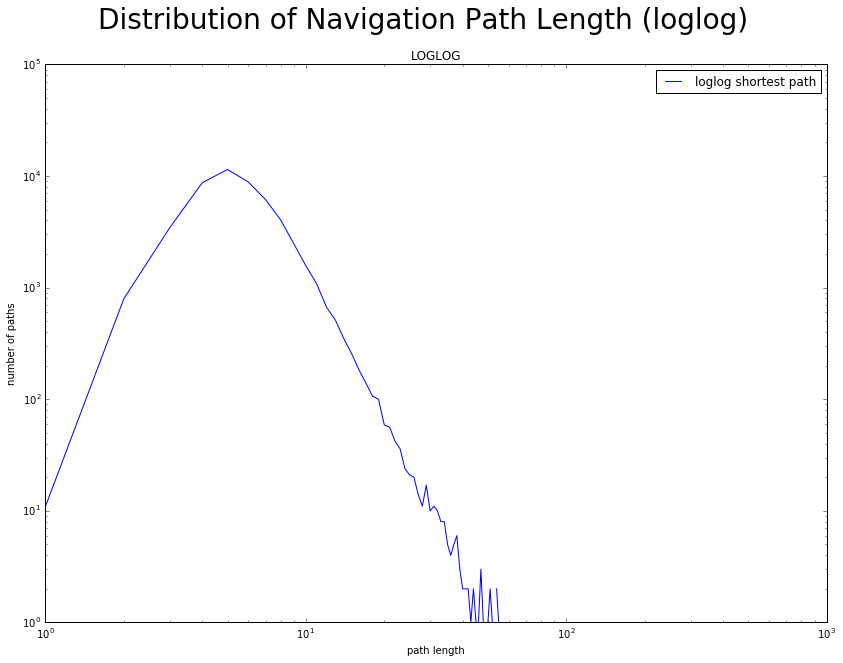

In [45]:
#loglog##############################
keys = steps_length_count.keys()
bin_steps = xrange(min(keys),max(keys))
hist_steps, bin_steps=np.histogram(steps_length, bins=bin_steps)

fig = plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Distribution of Navigation Path Length (loglog)', fontsize=28)

#plt.loglog(bin_steps[:-1], hist_steps, 'ro', color='red',markersize=4, clip_on=False)
logcurve=plt.loglog(bin_steps[:-1], hist_steps, label='loglog shortest path')
plt.legend(handles=logcurve)
plt.xlabel('path length')
plt.ylabel('number of paths')
plt.title("LOGLOG")
plt.show()

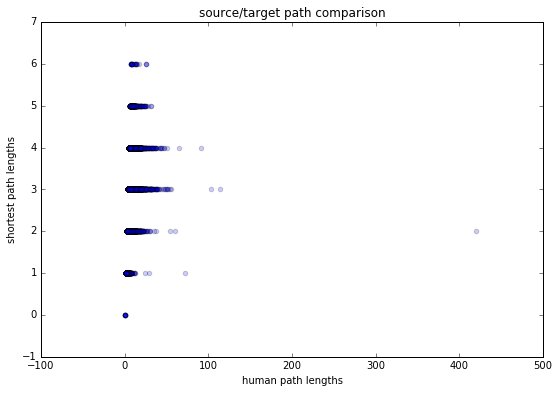

In [46]:
#correlation##############################
x, y = list(), list()
for path_length, step_length in zip(paths_length,steps_length): #paths_lengh -> shortest path ; steps_length -> human navigation path
    x.append(step_length)
    y.append(path_length)

# draw plot
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.scatter(x, y, alpha=0.2)
ax.set_xlabel('human path lengths')
ax.set_ylabel('shortest path lengths')
plt.title('source/target path comparison')
plt.show()

# Betweenness

An interesting definition of centrality is _betweenness centrality_ (here's a handy [link to the NetworkX documentation](http://networkx.readthedocs.io/en/stable/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html)). In a traditional setting, this measure calculates all shortest paths in the network and then each node gets a score according to which fraction of all shortest paths pass through that node.


In this part, we will create our own version of centrality, based on the _source_/_target_ pairs in our dataset. We define a nodes's **navigation centrality** as follows. 

> *Navigation centrality* of node $i$ is the fraction of all naviagtion paths that pass through $i$. We exclude the source and target from the count. If a node has not been visited by a search, the navigation centrality of that node is defined to be zero.

In the exercises below, we investigate the relationship between navigation centrality and betweenness centrality.

*Exercises*

> Begin by calculating the betweenness centrality and navigation centrality of all nodes in the wikispedia dataset.
> Note that calculating the betweenness centrality can take quite a long time, so you might start it running in a separate notebook while first estimating it based on the existing human path.
>
> * First, list the 5 pages with highest navigation centrality.
> * Second, list the 5 pages with highest betweenness centrality.
> * Compare the two lists. Explain the differences between the two lists in your own words.
> * Create a scatterplot of betweenness centrality vs. navigation centrality.
> * Let's explore the pages that have navigation centrality equal to zero.
>   * How many pages have zero navigation centrality?
>   * What is the the page with zero navigation centrality and highest betweenness centrality? Can you explain why no human navigated to this page? Can you explain why the page is central in the actual link network? (For example, you can take a look at the degree of the node).
>   * Plot the distribution of betweenness centrality for the pages with zero navigation centrality. My plot on log-log scale:
![alt text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/betweenness.png)

> * Now, let's *throw out all pages with zero navigation centrality* and compare navigation- and betweenness centrality for the remaining pages.
>   * What is the correlation between betweenness centrality and navigation centrality?
>   * Comment on the top 5 outliers.

### Q: First, list the 5 pages with highest navigation centrality. 

In [63]:
import operator
#First, list the 5 pages with highest navigation centrality.
nav_paths=list()
nav_uniq_paths=list()
nav_cent_dict=dict()
nav_cent_uniq_dict=dict()
for index, row in path_df.iterrows():    
    if row.values[0].split(';')[0]=="Bird" and row.values[0].split(';')[-1]=="Wikipedia_Text_of_the_GNU_Free_Documentation_License":
        print ("skips the unexist path at index",index)
        continue
    steps=urllib.unquote_plus(str(row.values[0])).split(';')
    clean_steps=filter(lambda step: step != '<', steps) 
    passed_steps=[clean_step for clean_step in clean_steps[1:-1]]
    nav_paths += passed_steps
    
    passed_uniq_steps=set(passed_steps)
    nav_uniq_paths += list(passed_uniq_steps)
    
arts_appears = Counter(nav_paths)  # if we believe each node is only visited at most once in a human navigation path
arts_uniq_appears = Counter(nav_uniq_paths) #if we believe a node can appear in a navigation path multiple times at it should only be counted once, 
#this case it will be treated as one based on the definition of betweeness cetrality
                   
#kevin's                 
for index, row in node_df.iterrows():
    articule=urllib.unquote_plus(str(row.values[0]))
    nav_cent_dict[articule]=0 #initalize to be 0 
    if arts_appears[articule]!=None:
        nav_cent_dict[articule]=arts_appears[articule]/len(nav_paths) 

print ("Kevin's Top 5 highest navigation centrality (including node revisit)", sorted(nav_cent_dict.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])

#kevin's
for index, row in node_df.iterrows():
    articule=urllib.unquote_plus(str(row.values[0]))
    nav_cent_uniq_dict[articule]=0 #initalize to be 0 
    if arts_uniq_appears[articule]!=None:
        nav_cent_uniq_dict[articule]=arts_uniq_appears[articule]/len(nav_uniq_paths)
print ("\n Kevin's Top 5 highest navigation centrality (excluding node revisit)", sorted(nav_cent_uniq_dict.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])

#mine
for index, row in node_df.iterrows():
    articule=urllib.unquote_plus(str(row.values[0]))
    nav_cent_dict[articule]=0 #initalize to be 0 
    if arts_appears[articule]!=None:
        nav_cent_dict[articule]=arts_appears[articule]/len(path_df.index) #devided by size of path file

print ("\nMy Top 5 highest navigation centrality (including node revisit)", sorted(nav_cent_dict.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])

#mine 
for index, row in node_df.iterrows():
    articule=urllib.unquote_plus(str(row.values[0]))
    nav_cent_uniq_dict[articule]=0 #initalize to be 0 
    if arts_uniq_appears[articule]!=None:
        nav_cent_uniq_dict[articule]=arts_uniq_appears[articule]/len(path_df.index) #devided by size of path file
print ("\nMy Top 5 highest navigation centrality (excluding node revisit)", sorted(nav_cent_uniq_dict.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])


skips the unexist path at index 2395
Kevin's Top 5 highest navigation centrality (including node revisit) [('United_States', 0.039464739346667145), ('Europe', 0.019316433503882072), ('United_Kingdom', 0.01726358724820208), ('Earth', 0.014101577873984758), ('England', 0.013967404916097177)]

 Kevin's Top 5 highest navigation centrality (excluding node revisit) [('United_States', 0.03926687234159076), ('Europe', 0.01944175687763559), ('United_Kingdom', 0.017173551908578104), ('Earth', 0.014175140108435715), ('England', 0.01392869530294456)]

My Top 5 highest navigation centrality (including node revisit) [('United_States', 0.17194746482715617), ('Europe', 0.08416150278654663), ('United_Kingdom', 0.07521727269184302), ('Earth', 0.06144043025838887), ('England', 0.06085584005612066)]

My Top 5 highest navigation centrality (excluding node revisit) [('United_States', 0.16766047001052262), ('Europe', 0.08301180872208581), ('United_Kingdom', 0.07332709770450914), ('Earth', 0.06052457227483534

### (Alert) There are quite few interpretable difference between Kevins and my answers in this setion.
**1. ** kevins equation to compute the betweeness value is COUNT/len(nav_paths), but by definition of betweeness centrality, the equation should be total number of shortest paths divides the number of those paths that pass through f.g. A. so I interpret this as COUNT/len(Size of the path_file). I think Kevin might be wrong in this division. If I use Kevin's approach, i got exact same answer as him (***Top 5 highest navigation centrality (including node revisit)***).


*** of course, the top 5 result gonna be the same for kevin & my answer as we are just dividing the count with a scale***

**2. ** another difference comes from whether multiple visits of the same node within a path should be counted once or twice. so i made it works for both cases, if we count multiple appearances of a specific node multiple times,, then of course, it leads to a relatively more times of visit of the node. In contrast, if we count multiple appearances as only once, then the times of visit to the node is smaller (the values of outputs above reveal the analysis). therefore, i made both cases (including & excluding).

### Q: Second, list the 5 pages with highest betweenness centrality.

In [64]:
bet_cent_dict = nx.betweenness_centrality(G)
#First, list the 5 pages with highest betweenness centrality.
print ("Top 5 highest betweeness centrality",sorted(bet_cent_dict.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])


Top 5 highest betweeness centrality [('United_States', 0.09360037318221961), ('United_Kingdom', 0.04216372076999775), ('England', 0.03223406679869209), ('Europe', 0.026851133195243015), ('Africa', 0.02407812666250011)]


### Q: Compare the two lists. Explain the differences between the two lists in your own words.

** Answer: ** The navigation centrality is respectively larger than the betweeness centrality of each node within the network. such surplus can be seen as human navigation path can pay some redandunt visits to nodes that are not necessary included in the shortest path. the redandunt visits of inrrelevant nodes certainly increase the navigation centrality of the nodes which leads to be larger than the true betweeness centrality  

### Q: Create a scatterplot of betweenness centrality vs. navigation centrality.

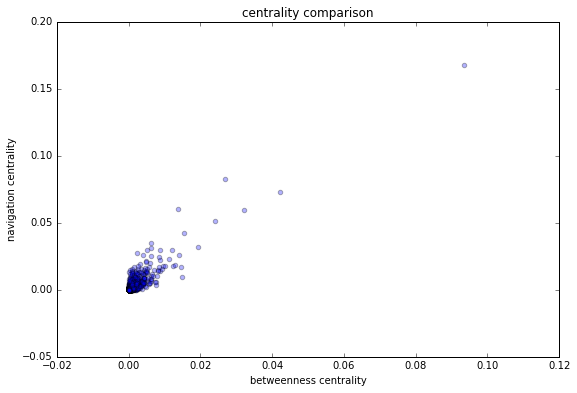

Correlation coefficient between betweenness centrality and navigation centrality = 0.912904656821


In [66]:
# add data betweenness centrality vs. navigation centrality in right order
x_bet, y_nav = list(), list()
for k, v in bet_cent_dict.iteritems():
    x_bet.append(v)
    y_nav.append(nav_cent_uniq_dict[k])

# draw plot
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.scatter(x_bet, y_nav, alpha=0.3)
ax.set_xlabel('betweenness centrality')
ax.set_ylabel('navigation centrality')
plt.title('centrality comparison')
plt.show()

print ("Correlation coefficient between betweenness centrality and navigation centrality =", np.corrcoef(
    x=x_bet, y=y_nav)[0,1])

### Q: How many pages have zero navigation centrality?

In [69]:
print ("Number of pages with zero navigation centrality =", len([cent for cent in nav_cent_uniq_dict.values() if cent == 0]))

Number of pages with zero navigation centrality = 1198


### Q: What is the the page with zero navigation centrality and highest betweenness centrality? Can you explain why no human navigated to this page? Can you explain why the page is central in the actual link network? (For example, you can take a look at the degree of the node).

In [67]:
highest_b_cent = 0
page_with_highest_cent = None
for key, cent in nav_cent_uniq_dict.iteritems():
    # has zero navigation centrality
    if cent == 0:
        # compare to previous highest value
        if bet_cent_dict[key] > highest_b_cent:
            highest_b_cent = bet_cent_dict[key]
            page_with_highest_cent = key

print ('Page with zero navigation centrality ({0}) and highest betweenness centrality ({1}) is {2}'.format(
    nav_cent_uniq_dict[page_with_highest_cent], bet_cent_dict[page_with_highest_cent], page_with_highest_cent))

Page with zero navigation centrality (0.0) and highest betweenness centrality (0.00111830217085) is TGV


*** Answer:  A rich informative page or, in other words, a node with high betweeness centrality can reference to many different target pages but it does not need to be well-known among people. For instance, the high-tech page "TGV" is rich in connecting with countries, companies etc. but these relations are beyond human preceptions and anticipations, so as a result, people rarely click the link to this page as people would believe a unfamiliar, unknown concept could not bring them to the target. Such belief leads to a low value in navigation centrality***

In [77]:
# looking at the degree of node TGV
print ("degree for node TGV:", G.degree(page_with_highest_cent))

degree_dis = sorted(nx.degree(G).values(),reverse=True) # degree sequence
d_max = max(degree_dis)
d_min = min(degree_dis)
print ("maximum degree:", d_max, "and minimum degree:", d_min)

degree for node TGV: 49
maximum degree: 1845 and minimum degree: 0


### Q: Plot the distribution of betweenness centrality for the pages with zero navigation centrality. My plot on log-log scale:

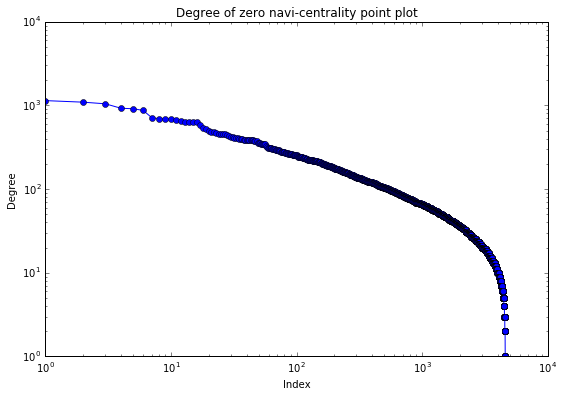

In [79]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.loglog(degree_dis, 'b-', marker='o')
ax.set_xlabel('Index')
ax.set_ylabel('Degree')
plt.title('Degree of zero navi-centrality point plot')
plt.show()

# Bringing the text into the picture

Now that we have an idea about the differences between how humans and computers search in networks, we are going to dig a little deeper using the page content to test a hypothesis to explain why the human navigation paths are longer. The general idea is that humans (who don't know about the global network structure) tend to jump between pages that have related _content_. For this reason we expect that (on average) human navigation paths have more similar content than the shortest paths in the network (which might take 'surprising' shortcuts via relatively unrelated pages). In short.

> **Hypothesis H1**: Human navigation paths have more similar content than network shortest paths.

The way we'll test this hypothesis is to first represent each page as a vector using a bag-of-words approach, then we can calculate a distance between pairs of pages using some vector-space difference, and finally we'll characterize each path by its average pair-wise distance. Below, I've set up that process as an exercise. 

*Exercises*

> First, create a TF-IDF vector for each page. You already know all about TF-IDF from last week's exercise. The main difference is that we now _characterize **each page** by a TF-IDF vector_ and not a group of pages.
> 
> Second, write a function that calculates the distance between a pair of vectors. There are many ways to calculate distances between a pair of vectors (try a Google search for `vector space distance measures` if you want to refresh your knowledge on this topic). You're free to choose what you want, but we recommend the [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity).
>
> Now you're ready for the exercises

In [94]:
import nltk,sys,codecs
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

plaintext_file_path=os.getcwd()+"\\wikispeedia_articles_plaintext\\plaintext_articles"
print(plaintext_file_path)

contents_dic = dict()

tokenizer = nltk.tokenize.RegexpTokenizer(r'[a-zA-Z]+')
stops = set(nltk.corpus.stopwords.words('english'))
wn=WordNetLemmatizer() #wordnet lemmatizer

def tokenize(page_text):
    page_tokens = tokenizer.tokenize(page_text)   
    page_tokens= [wn.lemmatize(word) for word in page_tokens if word.lower() not in stops and word.lower().isalpha() and len(word)>2]
    return page_tokens  

D:\1st Semester Master\Social Graphs and interaction\lesson8\wikispeedia_articles_plaintext\plaintext_articles


In [129]:
for filename in os.listdir(plaintext_file_path): ##get all filles in this dir
    with codecs.open(plaintext_file_path+"\\"+filename, "r", "utf-8") as f:
        f_text=f.read()
        f_tokens=tokenize(f_text)
    contents_dic[urllib.unquote_plus(filename).split('.txt')[0]]=f_tokens
#print (contents_dic.keys())

In [131]:
contents_tfidfdic=dict()
for k,v in contents_dic.iteritems():   
    ##dic for each articule
    contents_tfidfdic[k] = {
        'tf': dict(), 
        'idf': dict(),
        'tf-idf': dict(),
        'text': list()
    } 
    contents_tfidfdic[k]['text'] = v

print (contents_tfidfdic['Nephron']['text'])

[u'copyright', u'Nephron', u'Schools', u'Wikipedia', u'Selection', u'Related', u'subject', u'Health', u'medicine', u'Nephron', u'Nephron', u'kidney', u'without', u'juxtaglomerular', u'apparatus', u'Nephron', u'Diagram', u'labeled', u'Polish', u'flow', u'still', u'identified', u'Gray', u'subject', u'Precursor', u'Metanephric', u'blastema', u'MeSH', u'Nephrons', u'nephron', u'basic', u'structural', u'functional', u'unit', u'kidney', u'chief', u'function', u'regulate', u'water', u'soluble', u'substance', u'filtering', u'blood', u'reabsorbing', u'needed', u'excreting', u'rest', u'urine', u'Nephrons', u'eliminate', u'waste', u'body', u'regulate', u'blood', u'volume', u'pressure', u'control', u'level', u'electrolyte', u'metabolite', u'regulate', u'blood', u'function', u'vital', u'life', u'regulated', u'endocrine', u'system', u'hormone', u'antidiuretic', u'hormone', u'aldosterone', u'parathyroid', u'hormone', u'nephron', u'composed', u'initial', u'filtering', u'component', u'renal', u'corpusc

In [210]:
# compute the TF
from collections import OrderedDict

for k,v in contents_tfidfdic.iteritems():  
    wordcount= Counter(v['text'])                                           
    for token,count in wordcount.iteritems():                                      
        wordfreq=count/len(v['text'])
        contents_tfidfdic[k]['tf'][token] = wordfreq


KeyboardInterrupt: 

In [161]:
#word appearance across all files
import math
num_docs_containing = Counter()
for k,v in contents_tfidfdic.iteritems():
    for token in set(v['text']):
        num_docs_containing[token] += 1


In [209]:
# compute IDF
total_docs = len(contents_tfidfdic.keys())
for k,v in contents_tfidfdic.iteritems():
    for token in set(v['text']):       
        wordidf= math.log(total_docs / num_docs_containing[token])        
        contents_tfidfdic[k]['idf'][token] = wordidf

Exception KeyboardInterrupt in 'zmq.backend.cython.message.Frame.__dealloc__' ignored


KeyboardInterrupt: 

In [173]:
# compute TF-IDF
for k,v in contents_tfidfdic.iteritems():
    for token in set(v['text']):
        contents_tfidfdic[k]['tf-idf'][token] = contents_tfidfdic[k]['tf'][token] * contents_tfidfdic[k]['idf'][token]

In [175]:
# take the token list (values) of tf-idf over every article
tfidf_vec = dict()
for art in contents_tfidfdic:
    tfidf_vec[art] = contents_tfidfdic[art]['tf-idf'].values()

### Q:  Calculate the average similarity for all human navigation paths (the _source_/_target_ pairs from above). Calculate mean/variance of these average similarities.

In [176]:
# create a function to calculate the cosine similarity of two lists
def square_rooted(x):
    return math.sqrt(sum([a * a for a in x]))

def cosine_similarity(x,y):
    numerator = sum(a * b for a, b in zip(x, y))
    denominator = square_rooted(x) * square_rooted(y)
    return round((numerator/denominator), 3)

In [208]:
# cosine similarity of human navigation path
cos_sim_human_nav=dict()
for index, row in path_df.iterrows():
    if row.values[0].split(';')[0]=="Bird" and row.values[0].split(';')[-1]=="Wikipedia_Text_of_the_GNU_Free_Documentation_License":
        print ("skips the unexist path at index",index)
        continue
    cos_sim = list()
    steps=row.values[0].split(';')
    clean_steps=filter(lambda step: step != '<', steps) 
    i=0
    while i<=(len(clean_steps)-2):
        start=urllib.unquote_plus(str(clean_steps[i]))
        end=urllib.unquote_plus(str(clean_steps[i+1]))
        start_tfidf = tfidf_vec[start]
        end_tfidf = tfidf_vec[end]
        cos_sim.append(cosine_similarity(start_tfidf, end_tfidf))
        i=i+1
    
    avg_cos_sim = sum(cos_sim) / len(clean_steps)
    cos_sim_human_nav[index]=avg_cos_sim
    #print the first 10 rows of human navigation paths as sample computation
    if index<10:
        print ("index", index, " | ",cos_sim)

index 0  |  [0.353, 0.367, 0.444, 0.363, 0.197, 0.137, 0.328, 0.261]
index 1  |  [0.141, 0.321, 0.328, 0.261]
index 2  |  [0.165, 0.321, 0.422, 0.397, 0.38, 0.328, 0.261]
index 3  |  [0.228, 0.365, 0.402]
index 4  |  [0.164, 0.361, 0.347, 0.307, 0.248, 0.275]
index 5  |  [0.141, 0.302, 0.205, 0.263, 0.275]
index 6  |  [0.199, 0.211, 0.238]
index 7  |  [0.196, 0.341, 0.32, 0.359, 0.375]
index 8  |  [0.196, 0.364, 0.359]
index 9  |  [0.353, 0.257, 0.338, 0.334, 0.376, 0.375]
skips the unexist path at index 2395


In [194]:
a = np.array(cos_sim_human_nav.values())
print ("Mean", a.mean())
print ("Variance", a.var())

Mean 0.249248081461
Variance 0.00178885512509


### Q: Calculate the average similarity for all shortest paths between the _source_/_target_ pairs. Calculate mean/variance of these average similarities.

In [200]:
# cosine similarity of human navigation path
cos_sim_short_path=dict()
for index, row in path_df.iterrows():
    cos_sim_short = list()
    steps=row.values[0].split(';')
    hum_source=urllib.unquote_plus(str(steps[0]))
    hum_target=urllib.unquote_plus(str(steps[-1]))
    try:
        spath=nx.shortest_path(G,source=hum_source,target=hum_target) # take one shortest path for each pair of input
    except:
        print ("path does not exist between",hum_source,hum_target,"at row index",index)
        continue
    i=0
    while i<=len(spath)-2:
        start_spath_tfidf = tfidf_vec[spath[i]]
        end_spath_tfidf = tfidf_vec[spath[i+1]]
        cos_sim_short.append(cosine_similarity(start_spath_tfidf, end_spath_tfidf))
        i=i+1
    
    avg_spath_cos_sim = sum(cos_sim_short) / len(spath)
    cos_sim_short_path[index]=avg_spath_cos_sim
    #print the first 10 rows of shortest paths as sample computation
    if index<10:
        print ("index", index, " | ",cos_sim_short)

index 0  |  [0.173, 0.239, 0.216]
index 1  |  [0.173, 0.239, 0.216]
index 2  |  [0.173, 0.239, 0.216]
index 3  |  [0.133, 0.341]
index 4  |  [0.164, 0.339, 0.433]
index 5  |  [0.164, 0.339, 0.433]
index 6  |  [0.164, 0.287, 0.371]
index 7  |  [0.353, 0.185, 0.333]
index 8  |  [0.353, 0.185, 0.333]
index 9  |  [0.353, 0.185, 0.333]
path does not exist between Bird Wikipedia_Text_of_the_GNU_Free_Documentation_License at row index 2395


### Q: Plot the distributions of average similarities for both human- and shortest paths in a single plot. If everything works well, you should see something similar to the following:
![alt text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/path-similarity.png)

In [201]:
print (len(cos_sim_human_nav))
print (len(cos_sim_short_path))

51317
51317


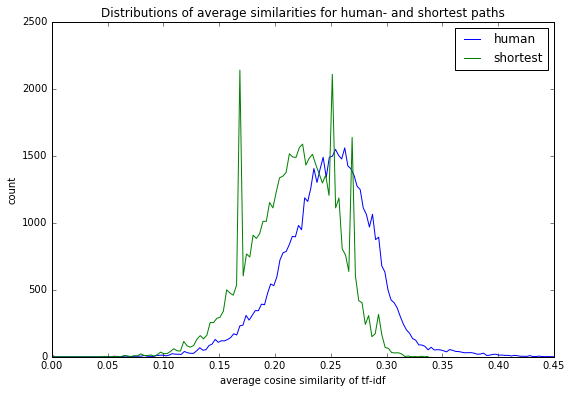

In [206]:
hist_h, bin_edges_h = np.histogram(cos_sim_human_nav.values(), bins='auto')
hist_nx, bin_edges_nx = np.histogram(cos_sim_short_path.values(), bins='auto')

# plot hist values on line
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.plot(bin_edges_h[:-1], hist_h, label='human')
ax.plot(bin_edges_nx[:-1], hist_nx, label='shortest')
plt.legend()
ax.set_xlim([0, 0.45])
ax.set_ylabel('count')
ax.set_xlabel('average cosine similarity of tf-idf')
plt.title('Distributions of average similarities for human- and shortest paths')
plt.show()

### Q: Finally, for each source/target pair, compare the human-navigation average similarity with the betweenness based average similarity, testing what fraction of the time, the average similarity is lower in the case of human navigation.

### Q: Comment on your findings. Is **H1** true?

*** Answer: Yes ***